In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve, confusion_matrix, classification_report

In [2]:
%%HTML
<style type = 'text/css'>
table.dataframe th, table.dataframe td{
    border: 1px black solid !important;
    color: black !important;
}

In [3]:
df = pd.read_csv('heart-disease.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

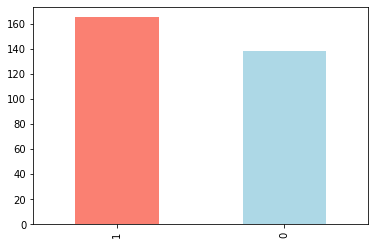

In [11]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding Patterns

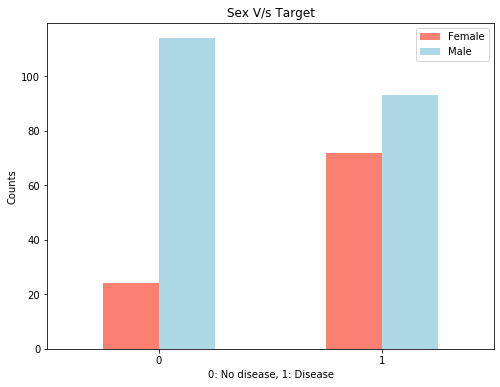

In [24]:
#Sex V/s Target

pd.crosstab(df.target, df.sex).plot(kind = 'bar',
                                    color = ['salmon','lightblue'],
                                    figsize = (8,6));

plt.title('Sex V/s Target')
plt.xlabel('0: No disease, 1: Disease')
plt.ylabel('Counts')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [21]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [23]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


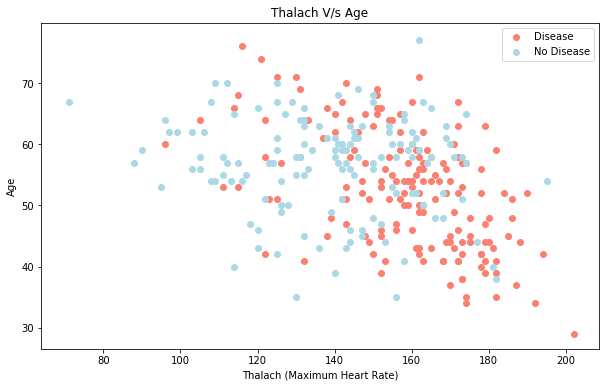

In [31]:
#Thalach(Max heart rate) V/s Age

plt.figure(figsize=(10,6))

plt.scatter(df.thalach[df.target == 1],
            df.age[df.target == 1],
            c = 'salmon');

plt.scatter(df.thalach[df.target == 0],
            df.age[df.target == 0],
            c = 'lightblue');

plt.title('Thalach V/s Age')
plt.xlabel('Thalach (Maximum Heart Rate)')
plt.ylabel('Age')
plt.legend(['Disease', 'No Disease']);


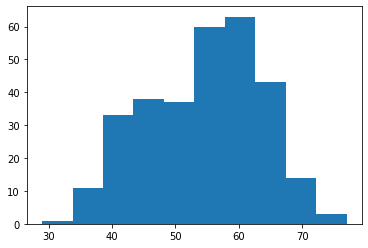

In [34]:
df['age'].hist(grid=False);

In [35]:
# CP(Chest pain type) V/s Target

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


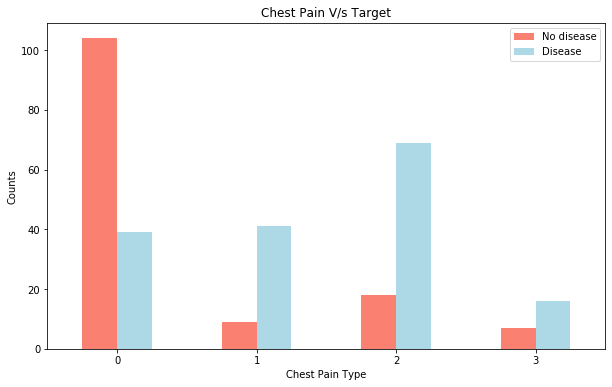

In [37]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   color = ['salmon', 'lightblue'],
                                   figsize=(10,6))

plt.title('Chest Pain V/s Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['No disease', 'Disease'])
plt.xticks(rotation=0);

In [38]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


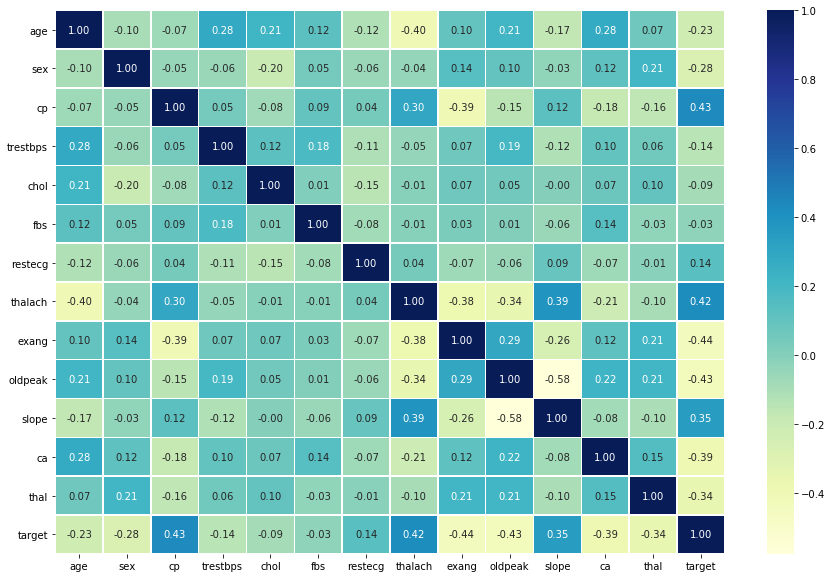

In [43]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt='.2f',
                 linewidths=0.5,
                 cmap='YlGnBu');

## Splitting data

Getting our data ready in train set and test set


In [8]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

## Modelling

We will be using 3 different scikit-learn models:
1. Logistic regression (Its not what its name suggests)
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier

We will create function in order to fit our data to the model and score it.

In [29]:
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    #We will setup random seed for reproduceable result
    np.random.seed(32)
    
    #We will create empty dict which will contain scores
    model_scores = {}
    
    #Looping through our models to fit and append the score to model_scores dict.
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores
    

In [30]:
scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [31]:
scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.5901639344262295,
 'Random Forest': 0.8360655737704918}

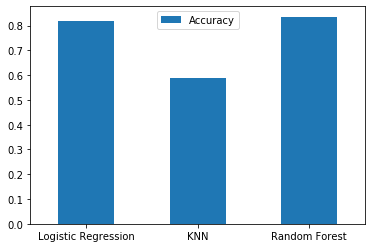

In [32]:
scores_df = pd.DataFrame(scores, index=['Accuracy'])

scores_df.T.plot(kind='bar')
plt.xticks(rotation=0);

## Hyperparameter tuning

We will be tuning out KNN model by hand and see if the score improves
 
Since we are doing it manually we will be tuning only one parameter

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

train_scores = []
#Daniel has recorded train scores but i dont see any point in it atleast for now.
test_scores = []

for i in range(1, 21):
    
    knn.set_params(n_neighbors = i)
    
    test_scores.append(knn.score(X_test, y_test))

In [54]:
test_scores

[0.5901639344262295,
 0.5245901639344263,
 0.639344262295082,
 0.6557377049180327,
 0.5901639344262295,
 0.5901639344262295,
 0.6885245901639344,
 0.639344262295082,
 0.639344262295082,
 0.6229508196721312,
 0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344]

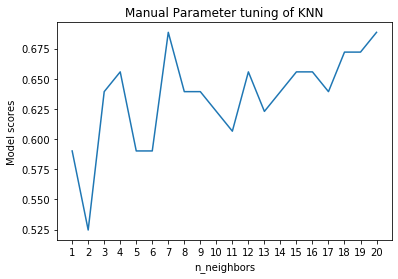

In [55]:
plt.plot(np.arange(1,21,1), test_scores, animated=True)


plt.xlabel('n_neighbors')
plt.ylabel('Model scores')
plt.xticks(np.arange(1,21,1))
plt.title('Manual Parameter tuning of KNN');

In [56]:
max(test_scores)

0.6885245901639344

In [7]:
np.logspace(1,10,)

array([1.00000000e+01, 1.77827941e+03, 3.16227766e+05, 5.62341325e+07,
       1.00000000e+10])

In [27]:
#Creating parameters grid.

log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

In [21]:
np.random.seed(32)

rs_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=1000),
                                param_distributions= log_reg_grid,
                                cv = 5,
                                n_iter = 30,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'C'...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [28]:
#Applying RandomizedSearchCV to RandomForestClassifier

rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = rf_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)

rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [29]:
rs_rfc.best_params_

{'n_estimators': 510,
 'min_samples_split': 2,
 'min_samples_leaf': 13,
 'max_depth': 5}

In [30]:
rs_rfc.score(X_test, y_test)

0.8032786885245902

In [31]:
log_reg_grid = {'C': np.logspace(-4,4,30),
                'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv = 5,
                          verbose = True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


In [32]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(X_test, y_test)

0.819672131147541

In [34]:
model = gs_log_reg

## Evaluation of model

1. ROC curve & AUC score
2. Confusion matric

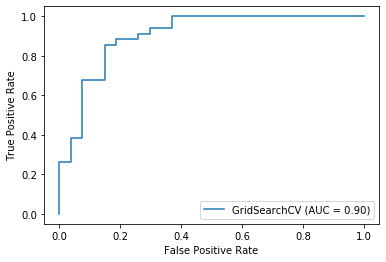

In [41]:
#ROC curve -: A perfect curve would be 90* up and 90* right.
#AUC score -: A perfect model would have AUC score of one

plot_roc_curve(model, X_test, y_test);

In [42]:
y_preds = model.predict(X_test)

In [48]:
confusion_matrix(y_test, y_preds)

array([[17, 10],
       [ 1, 33]], dtype=int64)

In [55]:
# WE will visualize confusion matric through seaborn

sns.set(font_scale= 1.5)

def plt_conf_mat(y_test, y_preds):
    
    fig, ax = plt.subplots()
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True)
    
    ax.set(xlabel = 'True labels',
           ylabel = 'Predicted labels',
           title = 'Confusion matrix heatmap')

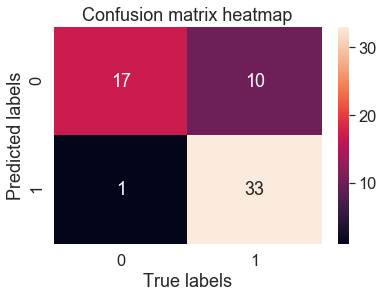

In [56]:
plt_conf_mat(y_test, y_preds)

# Classification report -: It gives us result of the following

1. Precision
2. Recall
3. f1-score

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.77      0.97      0.86        34

    accuracy                           0.82        61
   macro avg       0.86      0.80      0.81        61
weighted avg       0.85      0.82      0.81        61



In [61]:
cross_val_score(model, X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


array([0.81967213, 0.90163934, 0.86885246, 0.86666667, 0.75      ])

In [65]:
cv_score = np.array([0.81967213, 0.90163934, 0.86885246, 0.86666667, 0.75      ])

In [66]:
cv_score.mean()

0.84136612

In [64]:
from sklearn.model_selection import cross_val_score

In [68]:
model.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [82]:
scoring_methods = ['accuracy','precision','recall','f1']

scores = {}

def create_cross_val(model, X, y):
    
    for i in scoring_methods:
        
        cv_score = cross_val_score(model,
                                   X,
                                   y,
                                   cv = 5,
                                   scoring = i)
        
        cv_score = cv_score.mean()
        
        scores[i] = cv_score
    

In [83]:
create_cross_val(model, X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.2s finished


In [84]:
scores

{'accuracy': 0.8413661202185793,
 'precision': 0.82,
 'recall': 0.9151515151515153,
 'f1': 0.86406124093473}

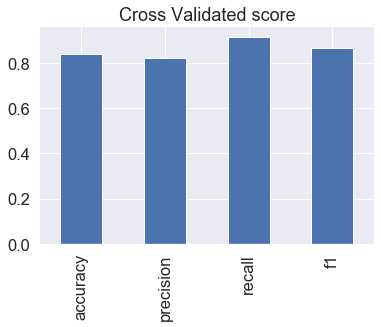

In [93]:
scores_df = pd.DataFrame(scores, index=[0])

scores_df.T.plot.bar(title="Cross Validated score",
                     legend=False);

### Feature Importance

In [100]:
model = LogisticRegression(C=0.1082636733874054,
                           solver = 'liblinear');

model.fit(X_train, y_train);

In [101]:
model.coef_

array([[-0.00763438, -0.55262936,  0.63189393, -0.00475588, -0.00197813,
        -0.08610767,  0.15035102,  0.02248566, -0.4113077 , -0.53336497,
         0.18037528, -0.55999742, -0.47393024]])

In [102]:
co_eff_relation = dict(zip(df.columns, list(model.coef_)[0]))

In [103]:
co_eff_relation

{'age': -0.007634379686651054,
 'sex': -0.5526293586791886,
 'cp': 0.6318939271433968,
 'trestbps': -0.004755883214229683,
 'chol': -0.001978134083395622,
 'fbs': -0.08610766626109424,
 'restecg': 0.15035101833253192,
 'thalach': 0.022485659354684103,
 'exang': -0.4113077040247989,
 'oldpeak': -0.5333649659282111,
 'slope': 0.1803752780237297,
 'ca': -0.5599974220373518,
 'thal': -0.4739302393223625}

In [104]:
co_ef_df = pd.DataFrame(co_eff_relation, index=[0])

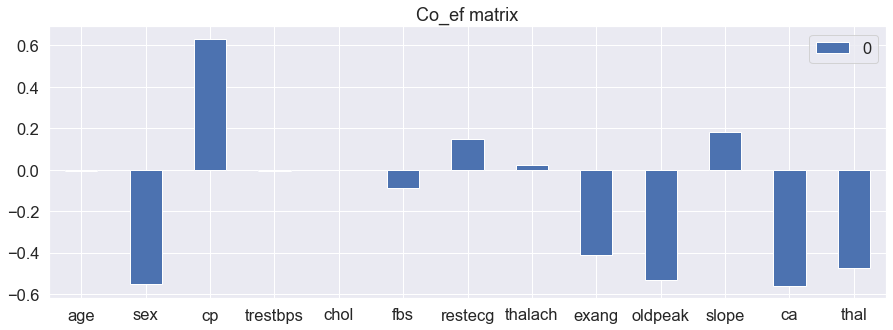

In [115]:
co_ef_df.T.plot.bar(title='Co_ef matrix', figsize=(15,5))

plt.xticks(rotation=0);

* In the feature importance we determine which features(aka non target columns) contribute most to target column

* The relation is positive coef or negative coef which is somewhat similar to direct & inverse proportion

* Also we can remove/ignore the feature which have nearly about 0

## Conclusion

* Here we come to end of this what I would call mini-project
* The we worked on had no null values neither we had to encode any feature columns into numerics
* Visualizations of the metrics and data are almost basic and could be better
* The final model we achieved didnt exactly lived upto the expectations (95% accuracy)
* Though hyperparameter tuning could be extended.
